In [1]:
import sys
import os
import cv2
import numpy as np
import shutil
from IPython.display import Image as img_display

In [2]:
print('\ndetect_er_chars.py')
print('       A simple demo script using the Extremal Region Filter algorithm described in:')
print('       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012\n')


detect_er_chars.py
       A simple demo script using the Extremal Region Filter algorithm described in:
       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012



In [3]:
pathname='./resources' #os.path.dirname(sys.argv[0])
file= os.path.join(pathname,"fax1","fax2.png") #pathname+'/'+'.png'
# display in IPython
# img_display(filename=file)

In [4]:
img = cv2.imread(file)#(str(sys.argv[1]))
gray= cv2.imread(file,0)#(str(sys.argv[1]),0)

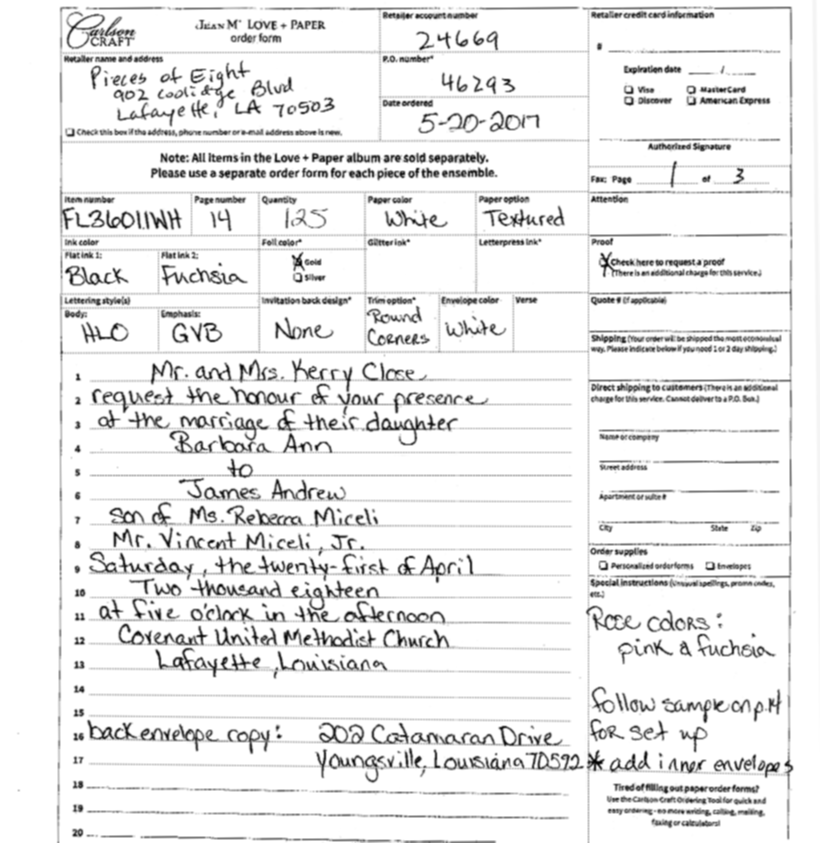

In [5]:
# apply blur
gray=cv2.GaussianBlur(gray, (3,3), 0)
cv2.imwrite(pathname+"/blur.png",gray)
img_display(filename=pathname+"/blur.png")

In [6]:
# invert color
# gray=cv2.bitwise_not(gray)
# cv2.imwrite(pathname+"/bitwise.png",gray)
# img_display(filename=pathname+"/bitwise.png")

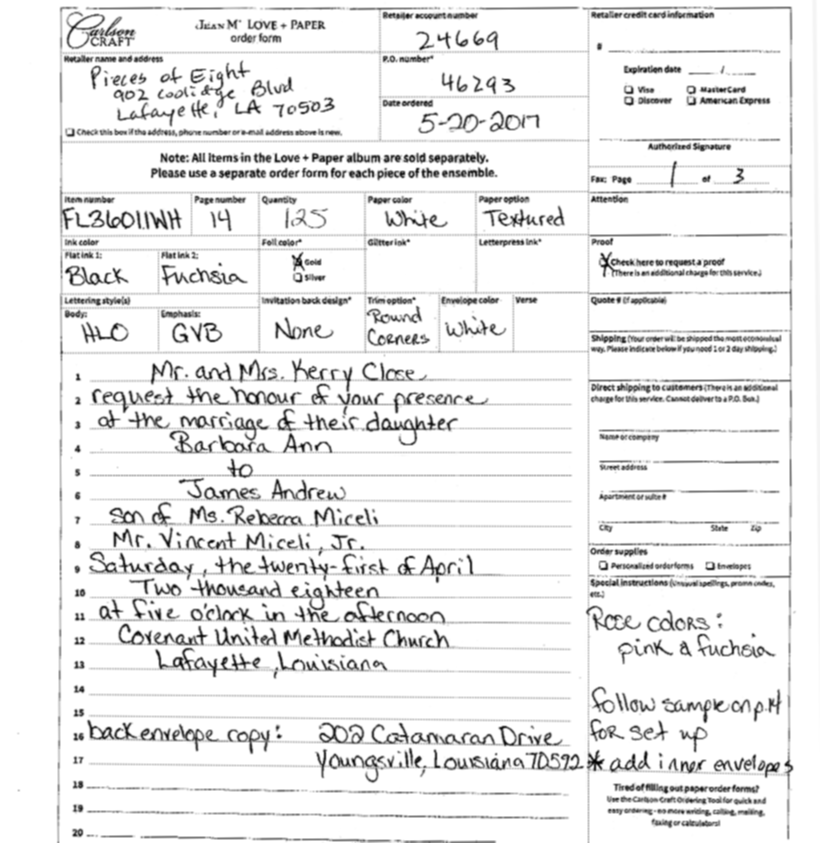

In [7]:
# Apply dilation and erosion to remove some noise
kernel =np.ones((1,1),np.uint8)
gray=cv2.dilate(gray,kernel,iterations=1)
gray=cv2.erode(gray,kernel,iterations=1)
cv2.imwrite(pathname+"/removed_noise.png",gray)
img_display(filename=pathname+"/removed_noise.png")

In [8]:
# bightness
# for x in range(0, len(gray)):
#     for y in range(0, len(gray[x])):
#         if gray[x,y]<255:
#             gray[x, y]=0
# cv2.imwrite(pathname+"/brightness.png",gray)
# img_display(filename=pathname+"/brightness.png")

In [9]:
# Apply threshold to get image with only black and white
# gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,1)
# ret,thresh = cv2.threshold(imgray,127,255,0)
# cv2.imwrite(pathname+"/thres.png",gray)
# img_display(filename=pathname+"/thres.png")

In [10]:
# MSER to detect regions
# mser = cv2.MSER_create(1,25,200)
mser = cv2.MSER_create(1,20,80,1)
regions,_ = mser.detectRegions(gray)
rects=[cv2.boundingRect(p.reshape(-1,1,2)) for p in regions]

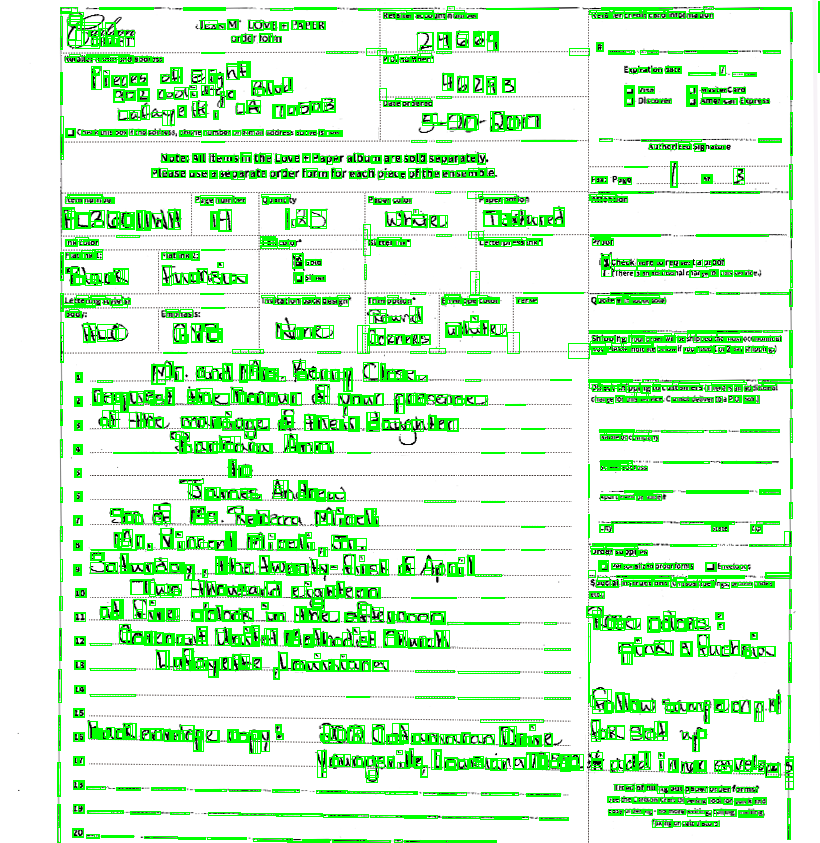

In [11]:
# draw hull lines
linesImg=img.copy()
# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
# cv2.polylines(linesImg, hulls, 1, (0, 255, 0))
for i,rect in enumerate(rects):
    cv2.rectangle(linesImg,rect[0:2],(rect[0]+rect[2],rect[1]+rect[3]),(0,255,0),1)
cv2.imwrite(pathname+"/linesImg.png",linesImg)
img_display(filename=pathname+"/linesImg.png")

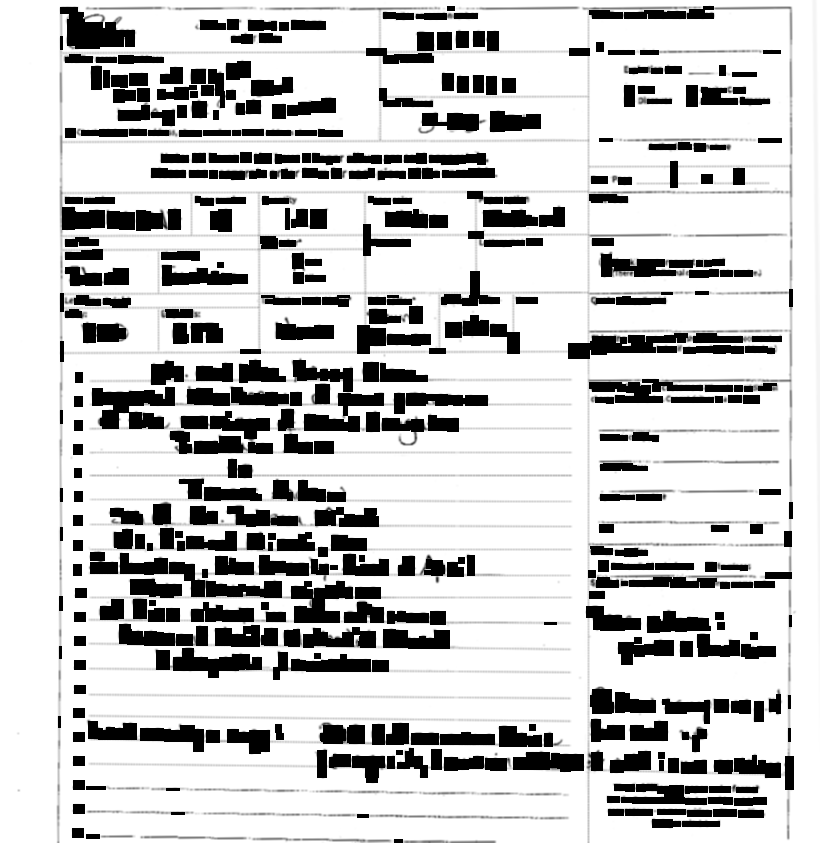

In [12]:
# draw rectangles
for i,rect in enumerate(rects):
        width=rect[2]
        height=rect[3]
        if width>1 and height>1 and (width/height<7.0) and (height/width<7.0):
            #print(str(width)+" "+str(height))
            #cv2.rectangle(gray,(0,0),(10,20),(0,255,0),2)
            offset=0
            (top,left)=(rect[0]-offset,rect[1]-offset)
            cv2.rectangle(gray,(top,left),(rect[0]+rect[2]+2*offset,rect[1]+rect[3]+2*offset),(0,0,0),-1)
    
cv2.imwrite(pathname+"/filled.png",gray)
img_display(filename=pathname+"/filled.png")

total 321 chars, 117 single chars, output rate 36.449%


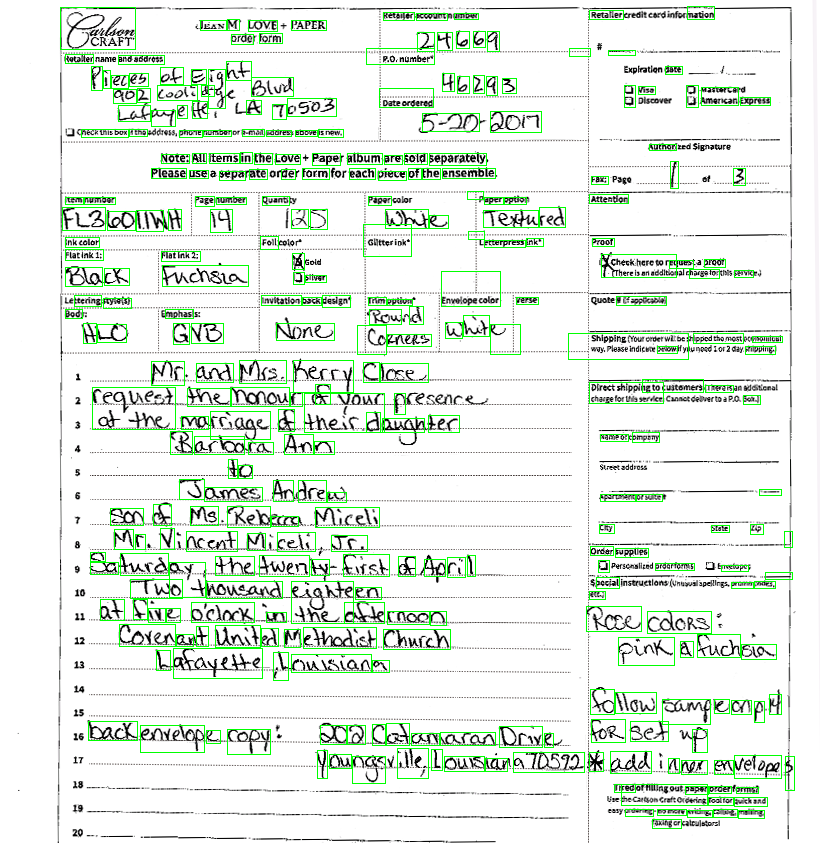

In [13]:
# detect black blocks
bgr=cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
gray=cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
# colours=['yellow','orange','red','green','black','white']
# lowers=[[30,255,255],[15,255,255],[6,255,255],[0,0,0],[0, 0, 205]]
# uppers=[[20,100,100],[5,100,100],[0,100,100],[180, 10, 50],[180, 10, 255]]

lower=np.array([0, 0, 0],np.uint8)
upper=np.array([180, 10, 50],np.uint8)
separated=cv2.inRange(gray,lower,upper)

#this bit draws a red rectangle around the detected region 
im2,contours,hierarchy=cv2.findContours(separated,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) 
max_area = 0 
largest_contour = None
outImg=img.copy()
# the total number of corp chars
total_corps=0
# the number of corp single chars 
single_corps=0
# the output path of corp chars
corp_chars_path=pathname+"/corp_chars"
# the output path of single chars
single_path=corp_chars_path+"/singles"
# the scalar of single char
single_scalar=1.8
if not os.path.exists(corp_chars_path):
    os.makedirs(corp_chars_path)
else:
    shutil.rmtree(corp_chars_path)
if not os.path.exists(single_path):
    os.makedirs(single_path)
else:
    shutil.rmtree(single_path)

for idx, contour in enumerate(contours): 
    area = cv2.contourArea(contour) 
    # if area > max_area: 
    max_area = area 
    largest_contour=contour 
    if largest_contour is not None:
        moment = cv2.moments(largest_contour) 
        # if moment["m00"] > 0: 
#             rect = cv2.minAreaRect(largest_contour) 
#             rect = ((rect[0][0], rect[0][1]), (rect[1][0], rect[1][1]), rect[2]) 
#             (height,width)=(rect[1][0],rect[1][1]) 
#             if (height>1.0 and width>1.0 and ((width/height)<5) and ((height/width)<5)):
#                 # print(str(width)+" "+str(height)) 
#                 box = cv2.boxPoints(rect)
#                 box = np.int0(box) 
#                 cv2.drawContours(img,[box], 0, (0, 255, 0), 1)
#                 # box = [[bottom,right],[bottom,left],[top,left],[top,right]]
#                 # crop chars
#                 top    = box[2][0]
#                 left   = box[2][1]
#                 bottom = box[0][0]
#                 right  = box[0][1]
#                 # Create mask where white is what we want, black otherwise
#                 mask = np.zeros_like(outImg)
#                 # Draw filled contour in mask
#                 cv2.drawContours(mask, [box], 0, (255, 255, 255), -1)
#                 # Extract out the object and place into output image
#                 out = np.zeros_like(outImg) 
#                 out[mask == 255] = outImg[mask == 255]
#                 outfile="{0}/corp_chars/{1}_{2}_{3}_{4}_{5}.jpg".format(pathname,idx,top,left,right,bottom)
#                 cv2.imwrite(outfile,out)

        rect = cv2.boundingRect(largest_contour)
        (height,width)=(rect[2],rect[3])
        area=cv2.contourArea(largest_contour)
        if (height>1.0 and width>1.0 and ((width/height)<6) and ((height/width)<6) and area>100):
            # print(cv2.contourArea(largest_contour))
            total_corps+=1
            x,y,w,h = rect
            offset=0
            cropped = outImg[y:y+h,x:x+w]
            outfile=""
            if (width/height>=1.0 and width/height<=single_scalar) or (height/width>=1.0 and height/width<=single_scalar):
                single_corps+=1
                outfile="{0}/{1}_{2}_{3}_{4}_{5}.png".format(single_path,idx,x,y,w,h)
            else:
                outfile="{0}/{1}_{2}_{3}_{4}_{5}.png".format(corp_chars_path,idx,x,y,w,h)
            cv2.imwrite(outfile,cropped)
            cv2.rectangle(img,(x-offset,y-offset),(x+w+2*offset,y+h+2*offset),(0,255,0),1)

print("total {0} chars, {1} single chars, output rate {2:0.3f}%".format(total_corps,single_corps,single_corps/total_corps*100))
cv2.imwrite(pathname+"/result.png",img)
img_display(filename=pathname+"/result.png")